In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
#Datenset laden 
df = pd.read_csv("heartdata.csv")
print(df)
# Korrelationsmatrix anzeigen
print(df.corr())

# Pearson-Korrelation zwischen Variablen berechnen
corr_biking = pearsonr(df["biking"], df["heartdisease"])
corr_smoking = pearsonr(df["smoking"], df["heartdisease"])
print("Biking vs Heart Disease:", corr_biking)
print("Smoking vs Heart Disease:", corr_smoking)


     Unnamed: 0     biking    smoking  heartdisease
0             1  30.801246  10.896608     11.769423
1             2  65.129215   2.219563      2.854081
2             3   1.959665  17.588331     17.177803
3             4  44.800196   2.802559      6.816647
4             5  69.428454  15.974505      4.062224
..          ...        ...        ...           ...
493         494  47.660440  27.562464     11.294392
494         495  45.097203  21.385620      9.616762
495         496   8.279743   6.423720     13.495168
496         497  42.345863  20.741328     10.115865
497         498  30.774254  23.610175     11.843556

[498 rows x 4 columns]
              Unnamed: 0    biking   smoking  heartdisease
Unnamed: 0      1.000000  0.057088  0.052674     -0.051725
biking          0.057088  1.000000  0.015136     -0.935455
smoking         0.052674  0.015136  1.000000      0.309131
heartdisease   -0.051725 -0.935455  0.309131      1.000000
Biking vs Heart Disease: PearsonRResult(statistic=np.floa

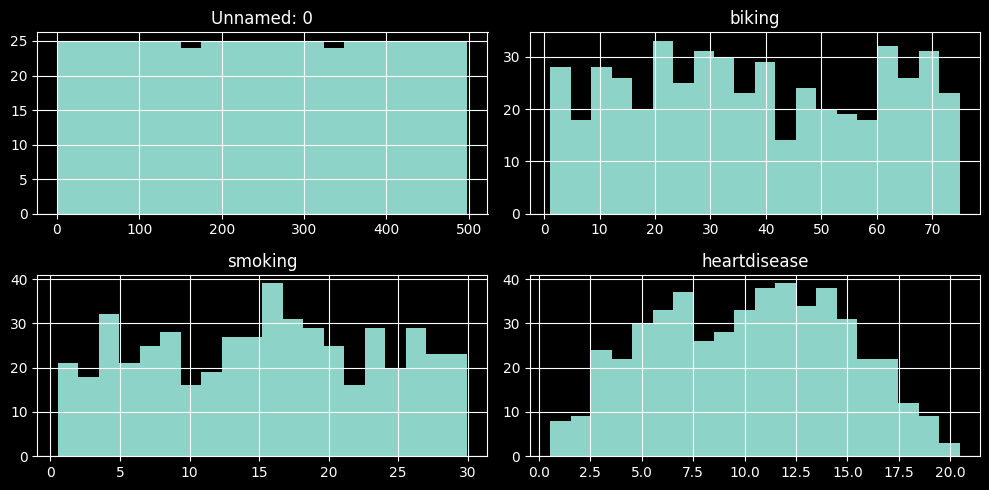

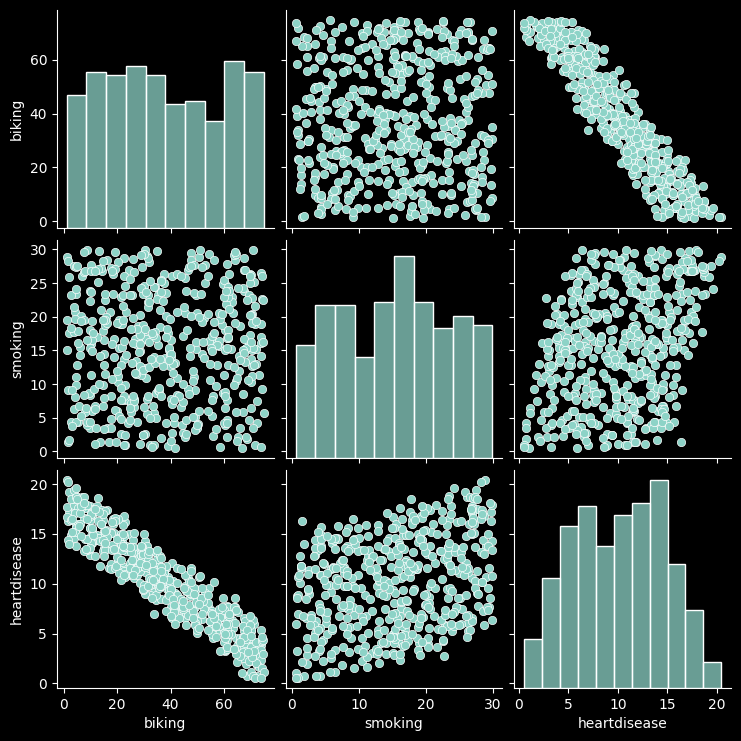

In [12]:
# Histogramme
df.hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Beziehungen visuell darstellen
sns.pairplot(df[['biking', 'smoking', 'heartdisease']])
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression

# Features und Zielvariable
X = df[['biking', 'smoking']]
y = df['heartdisease']

# Modell initialisieren und fitten
model = LinearRegression()
model.fit(X, y)

# Koeffizienten und Achsenabschnitt anzeigen
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.20013305  0.17833391]
Intercept: 14.984657987225848


R² score: 0.9796174523377278


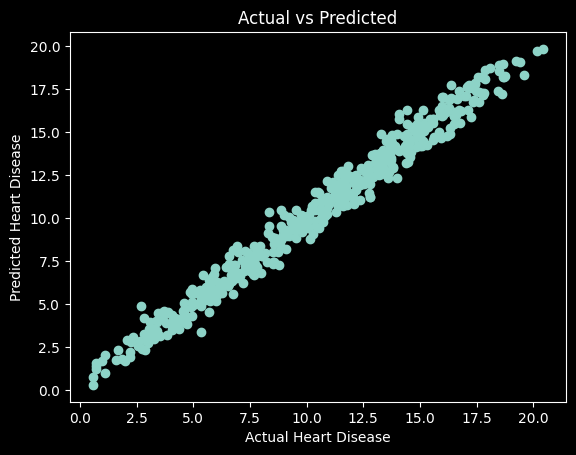

In [14]:
from sklearn.metrics import r2_score

# Vorhersagen erstellen
y_pred = model.predict(X)

# Modellgüte anzeigen
print("R² score:", r2_score(y, y_pred))

# Vorhersage vs. Realität visualisieren
plt.scatter(y, y_pred)
plt.xlabel("Actual Heart Disease")
plt.ylabel("Predicted Heart Disease")
plt.title("Actual vs Predicted")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell fitten und testen
model_cv = LinearRegression()
model_cv.fit(X_train, y_train)
y_test_pred = model_cv.predict(X_test)

# Performance auf Testdaten
print("Test R² score:", r2_score(y_test, y_test_pred))


Test R² score: 0.9751106638392245


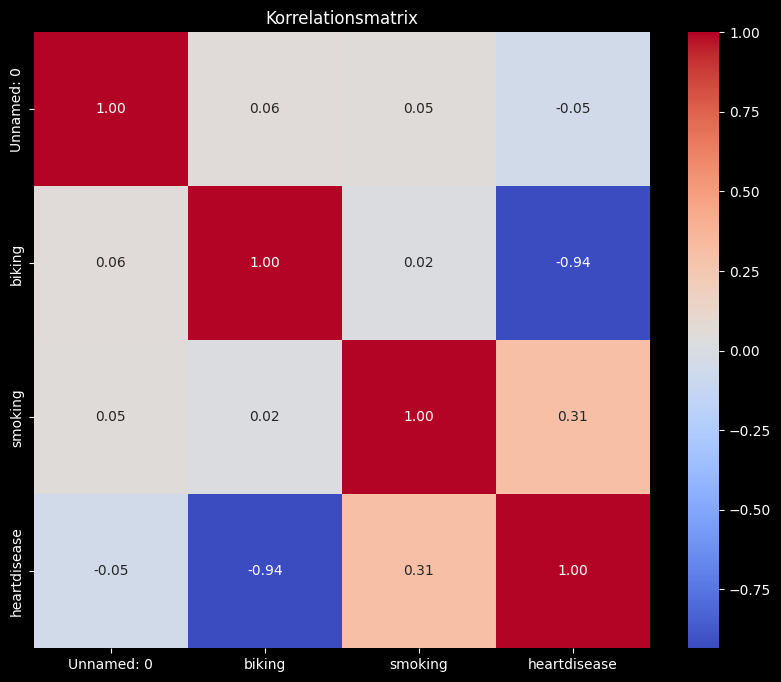

In [19]:
# Korrelationsmatrix berechnen und visualisieren
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Korrelationsmatrix")
plt.show()
